In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Downloads\housing_train.csv")

data.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al


In [3]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [4]:
data1 = data.dropna()

In [5]:
data1.shape

(164283, 22)

In [6]:
data1.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

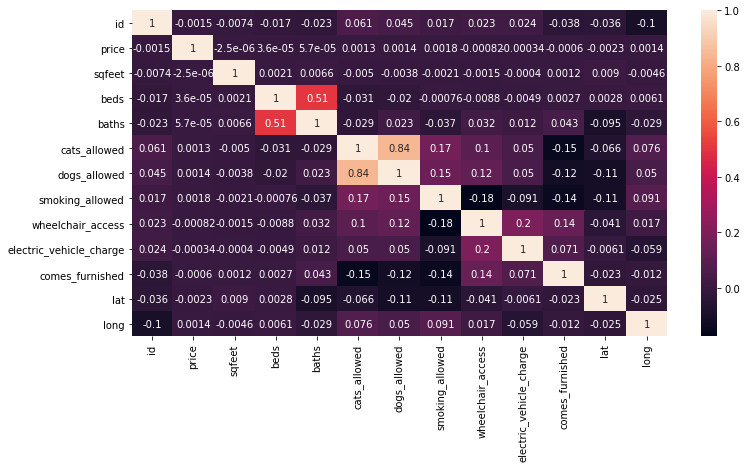

In [7]:
plt.figure(figsize=(12,6)) 
sns.heatmap(data1.corr(), annot=True)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

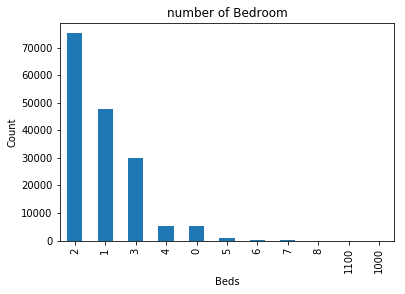

In [8]:
data1['beds'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Beds')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Latitude vs Price')

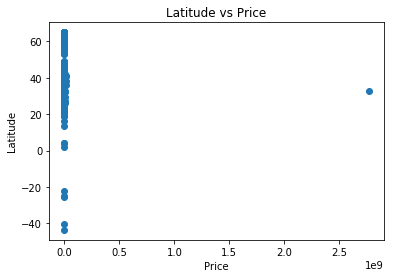

In [9]:
plt.scatter(data1.price,data1.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

Text(0.5, 1.0, 'Price vs Square feet')

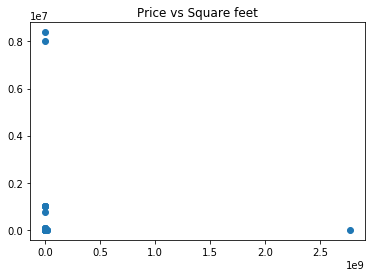

In [10]:
plt.scatter(data1['price'], data1['sqfeet'])
plt.title('Price vs Square feet')

In [11]:
data1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
data1.type = le.fit_transform(data1.type)

In [15]:
data1.laundry_options = le.fit_transform(data1.laundry_options)

In [16]:
data1.parking_options = le.fit_transform(data1.parking_options)

In [17]:
data1.description = le.fit_transform(data1.description)

In [18]:
data1.state = le.fit_transform(data1.state)

In [32]:
data1.region = le.fit_transform(data1.region)

In [33]:
data1.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,21,https://bham.craigslist.org,1195,0,1908,3,2.0,1,...,0,0,0,1,5,https://images.craigslist.org/00L0L_80pNkyDeG0...,16423,33.4226,-86.7065,1
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,21,https://bham.craigslist.org,1120,0,1319,3,2.0,1,...,0,0,0,1,4,https://images.craigslist.org/00707_uRrY9CsNMC...,42318,33.3755,-86.8045,1
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,21,https://bham.craigslist.org,825,0,1133,1,1.5,1,...,0,0,0,1,5,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,16391,33.4226,-86.7065,1
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,21,https://bham.craigslist.org,800,0,927,1,1.0,1,...,0,0,0,1,5,https://images.craigslist.org/00808_6ghZ8tSRQs...,16461,33.4226,-86.7065,1
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,21,https://bham.craigslist.org,785,0,1047,2,1.0,1,...,0,0,0,1,5,https://images.craigslist.org/00y0y_21c0FOvUXm...,16375,33.4226,-86.7065,1


In [34]:
X = data1.drop(['price', 'region_url', 'id', 'url', 'image_url' ], axis=1)

In [35]:
X.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,21,0,1908,3,2.0,1,1,1,0,0,0,1,5,16423,33.4226,-86.7065,1
1,21,0,1319,3,2.0,1,1,1,0,0,0,1,4,42318,33.3755,-86.8045,1
2,21,0,1133,1,1.5,1,1,1,0,0,0,1,5,16391,33.4226,-86.7065,1
3,21,0,927,1,1.0,1,1,1,0,0,0,1,5,16461,33.4226,-86.7065,1
4,21,0,1047,2,1.0,1,1,1,0,0,0,1,5,16375,33.4226,-86.7065,1


In [36]:
y = data1['price']

In [37]:
from sklearn import model_selection

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split


In [39]:
X_train.shape, y_train.shape

((131426, 17), (131426,))

In [40]:
X_test.shape, y_test.shape

((32857, 17), (32857,))

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(reg.intercept_)

7386.0580658205145


In [46]:
reg.coef_

array([ 2.40120670e+00, -2.50152014e+01,  1.72420918e-04,  3.31196185e+01,
       -5.13804067e+02,  2.50626762e+03, -3.47316044e+03,  3.75895585e+02,
        6.64838813e+02,  2.52998278e+02,  4.48215718e+02, -1.16522487e+02,
       -1.68848070e+02, -1.24122729e-02, -7.26474212e+01,  1.21104445e+01,
        5.11948946e+01])

In [49]:
prediction = reg.predict(X)

prediction

array([1326.03121204, 1175.59678997, 1516.95757507, ..., 1608.1985396 ,
       3419.17219671, 1692.80535776])

In [52]:
import statsmodels as sm

import statsmodels.formula.api as smf

In [54]:
model = smf.ols('y~X',data1)

model

In [55]:
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2841
Date:                Wed, 06 May 2020   Prob (F-statistic):              0.998
Time:                        18:39:57   Log-Likelihood:            -2.8184e+06
No. Observations:              164283   AIC:                         5.637e+06
Df Residuals:                  164265   BIC:                         5.637e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.87e+05   1.98e+05      0.946      0.3

In [62]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [63]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
clf.score(X_test,y_test)

-3.94207395044699e-05

In [68]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [69]:
pca = PCA()

In [70]:
pca.fit_transform(scale(X))

array([[-0.95067829, -0.16736883,  0.00458731, ..., -0.07768735,
        -1.16304407, -0.07509243],
       [-0.96424331,  0.11325581, -0.06398398, ...,  0.07303426,
        -1.17820008, -0.06868293],
       [-1.18169862, -0.55681696, -0.4954145 , ...,  0.15069036,
        -0.9412237 , -0.08471134],
       ...,
       [-1.0765219 , -0.05953496,  1.9803381 , ..., -0.63263523,
         0.18976538,  0.00381161],
       [-0.7387927 , -0.80544945,  1.49449361, ..., -0.38799417,
         0.42781727, -0.0419125 ],
       [-1.49989016, -1.01652214,  1.74244905, ..., -0.49243576,
         0.59125826, -0.04343815]])